# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('orders.csv')

# Display the first few rows of the dataset
print(data.head())

   order_id  shop_id  user_id  order_value  total_items payment_method  \
0         1       53      746          224            2           cash   
1         2       92      925           90            1           cash   
2         3       44      861          144            1           cash   
3         4       18      935          156            1    credit_card   
4         5       18      883          156            1    credit_card   

        created_at  
0  2017/3/13 12:36  
1   2017/3/3 17:38  
2   2017/3/14 4:23  
3  2017/3/26 12:43  
4    2017/3/1 4:35  


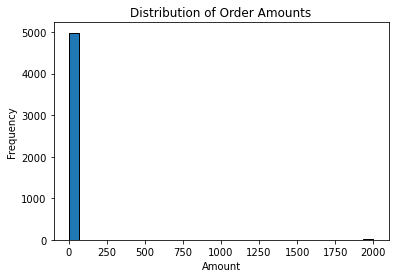

In [20]:
plt.hist(data['total_items'], bins=30, edgecolor='k')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Order Amounts')
plt.show()

It shows that there are some extreme values (about 2000) in the order amounts.



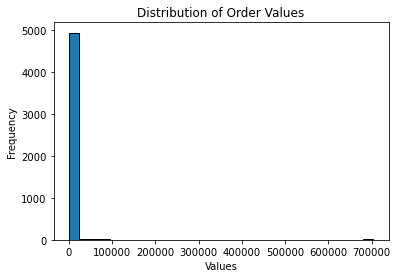

In [21]:
plt.hist(data['order_value'], bins=30, edgecolor='k')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.show()

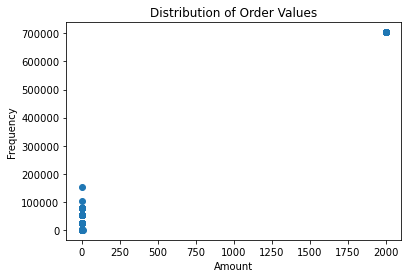

In [22]:
plt.scatter(x = data['total_items'], y = data['order_value'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.show()

It shows that there are some extreme values (about 700000) in the order values.
Based on the above graphs, when we see extreme outliers, we can choose to exclude them from our analysis. 
Extreme values can distort the AOV metric.

When we take a look at the average value for one item:

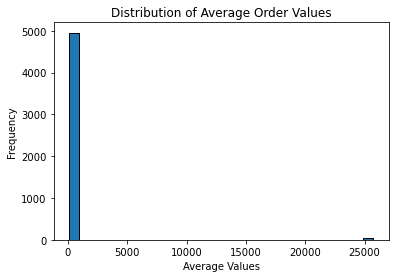

In [23]:
data['avg_value'] = data['order_value']/data['total_items']
plt.hist(data['avg_value'], bins=30, edgecolor='k')
plt.xlabel('Average Values')
plt.ylabel('Frequency')
plt.title('Distribution of Average Order Values')
plt.show()

It is obvious that there are some extreme outliers and they should be excluded in our analysis.

New metric: Average order values after filtering.

In [24]:
filtered_data = data[data.get('avg_value')<5000]

In [25]:
new_avg = filtered_data['avg_value'].mean()
new_avg
print("New AOV after outlier removal:", new_avg)

New AOV after outlier removal: 149.25934433075798
